<a href="https://colab.research.google.com/github/montblanc-1981/deeplearning-kadai/blob/main/vgg16_cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import utils
utils.set_random_seed(0)

In [2]:
import tensorflow as tf
data = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [3]:
(x_train, y_train), (x_test, y_test) = data

In [4]:
x_train = x_train / 255
x_test = x_test / 255

In [5]:
from tensorflow.keras import utils
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
vgg16_without_fc = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


58889256/58889256 [==============================] - 0s 0us/step


In [7]:
vgg16_without_fc.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [8]:
from tensorflow.keras.models import Sequential
model = Sequential()
for layer in vgg16_without_fc.layers:
    model.add(layer)

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [10]:
for layer in model.layers:
    layer.trainable = False

In [11]:
from tensorflow.keras.layers import Flatten, Dense
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0         
                                                                 
 block3_conv1 (Conv2D)       (None, 8, 8, 256)         2

In [13]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics='accuracy')

In [14]:
history = model.fit(x_train, y_train,
    batch_size=128,
    epochs=10,
    validation_split=0.1)


Epoch 1/10
352/352 [==============================] - 13s 23ms/step - loss: 1.4308 - accuracy: 0.4998 - val_loss: 1.2128 - val_accuracy: 0.5628
Epoch 2/10
352/352 [==============================] - 6s 18ms/step - loss: 1.1991 - accuracy: 0.5821 - val_loss: 1.1586 - val_accuracy: 0.5922
Epoch 3/10
352/352 [==============================] - 6s 17ms/step - loss: 1.1363 - accuracy: 0.6023 - val_loss: 1.1565 - val_accuracy: 0.5980
Epoch 4/10
352/352 [==============================] - 6s 18ms/step - loss: 1.0858 - accuracy: 0.6204 - val_loss: 1.1171 - val_accuracy: 0.6022
Epoch 5/10
352/352 [==============================] - 6s 18ms/step - loss: 1.0489 - accuracy: 0.6333 - val_loss: 1.1059 - val_accuracy: 0.6152
Epoch 6/10
352/352 [==============================] - 6s 18ms/step - loss: 1.0124 - accuracy: 0.6439 - val_loss: 1.0984 - val_accuracy: 0.6166
Epoch 7/10
352/352 [==============================] - 6s 18ms/step - loss: 0.9734 - accuracy: 0.6559 - val_loss: 1.1008 - val_accuracy: 0.619

<Axes: >

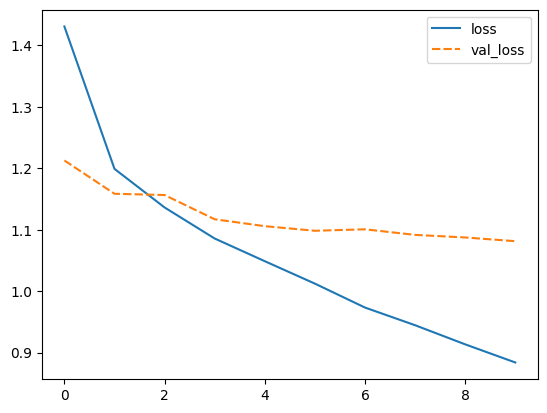

In [15]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame(history.history)
sns.lineplot(data=df[['loss', 'val_loss']])

<Axes: >

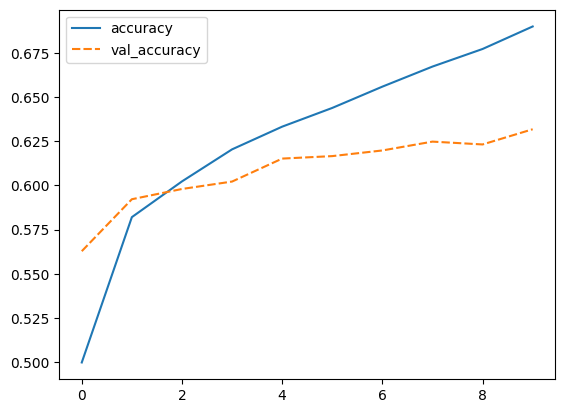

In [16]:
sns.lineplot(data=df[['accuracy', 'val_accuracy']])

In [17]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 4s 10ms/step - loss: 1.1251 - accuracy: 0.6139


[1.1251087188720703, 0.6139000058174133]